<a href="https://colab.research.google.com/github/Patralekha/Flight-Reservation-System/blob/master/Cluster%20then%20Predict_K%3D2_point%3D%5B65.5%2C87%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=3)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

     Subjective Score   MCQ Score
0           95.999390  144.210772
1          106.563492  155.388131
2          104.570527   73.284678
3          114.187065  109.792058
4           83.675910   80.207756
..                ...         ...
795        102.620530   55.923431
796        104.702048  101.853851
797        111.627932   56.275436
798        119.540366   88.915376
799        116.570304  101.560565

[800 rows x 2 columns]


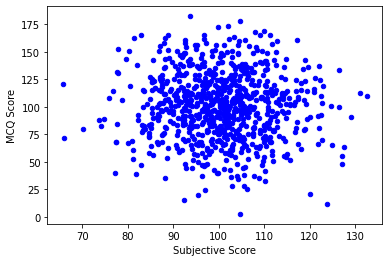

Centroids for n_clusters=3:
 [[ 99.56641866 140.10540359]
 [100.3711082   65.21146805]
 [100.8280886  103.49830282]]


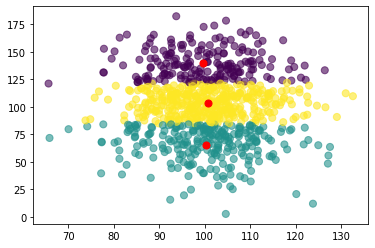

Centroids for n_clusters= 2 :
 [[100.25281272  75.08413563]
 [100.51122416 123.51444142]]
Minimum distance of point from nearest centroid= 34.55596362345237
NEAREST CENTROID [100.25281272  75.08413563]
For n_clusters = 2 The average silhouette_score is : 0.46532619078607723 

Centroids for n_clusters= 3 :
 [[100.8280886  103.49830282]
 [100.3711082   65.21146805]
 [ 99.56641866 140.10540359]]
Minimum distance of point from nearest centroid= 36.57308598677381
NEAREST CENTROID [100.3711082   65.21146805]
For n_clusters = 3 The average silhouette_score is : 0.4240642824213876 

Centroids for n_clusters= 4 :
 [[101.33854267  55.52995035]
 [100.95465732 112.82336992]
 [ 99.48781554  86.84886554]
 [ 99.84695738 145.48085214]]
Minimum distance of point from nearest centroid= 35.14598625613688
NEAREST CENTROID [99.48781554 86.84886554]
For n_clusters = 4 The average silhouette_score is : 0.371024386138474 

Centroids for n_clusters= 5 :
 [[102.16210465  44.61669392]
 [101.36798433 117.64482961

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


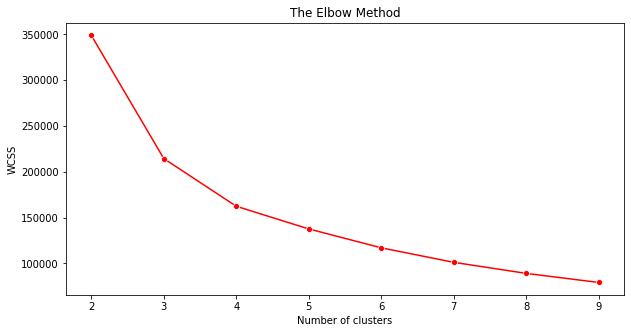

For n_clusters = 2 The average silhouette_score is : 0.46532619078607723
For n_clusters = 3 The average silhouette_score is : 0.4240642824213876
For n_clusters = 4 The average silhouette_score is : 0.37213084253591416
For n_clusters = 5 The average silhouette_score is : 0.33259034636380114
For n_clusters = 6 The average silhouette_score is : 0.3435526310445887
For n_clusters = 7 The average silhouette_score is : 0.3325082381834321
For n_clusters = 8 The average silhouette_score is : 0.3410851465945322
For n_clusters = 9 The average silhouette_score is : 0.3354719616398888


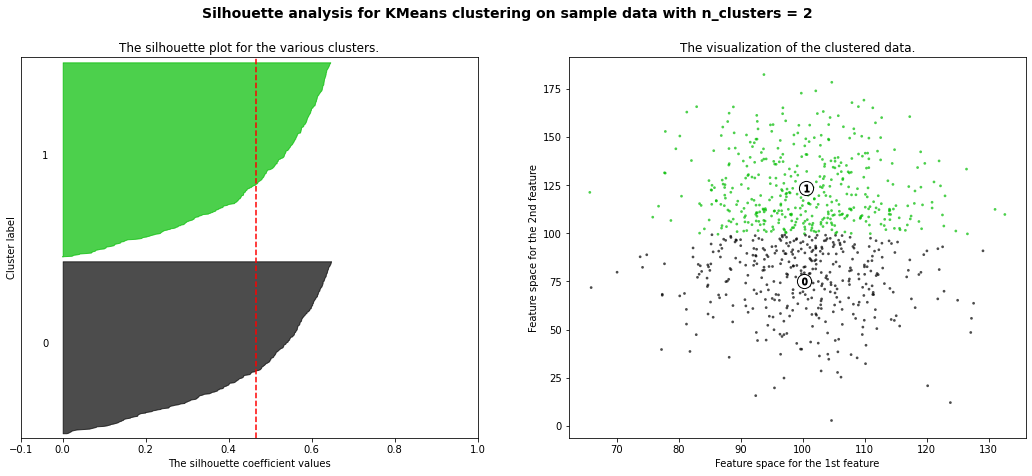

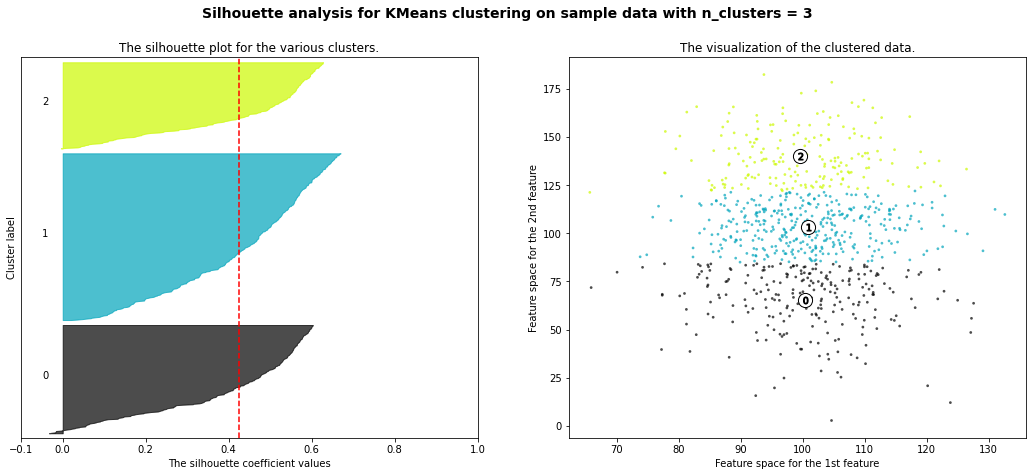

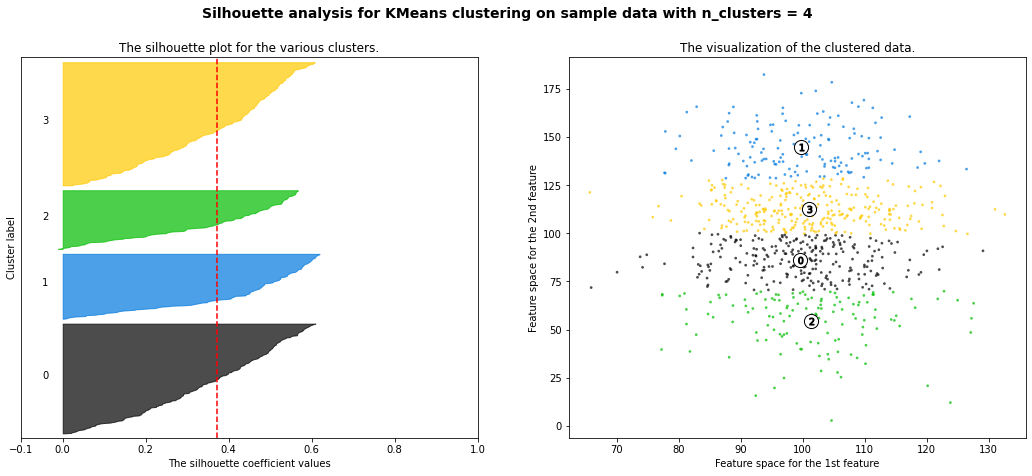

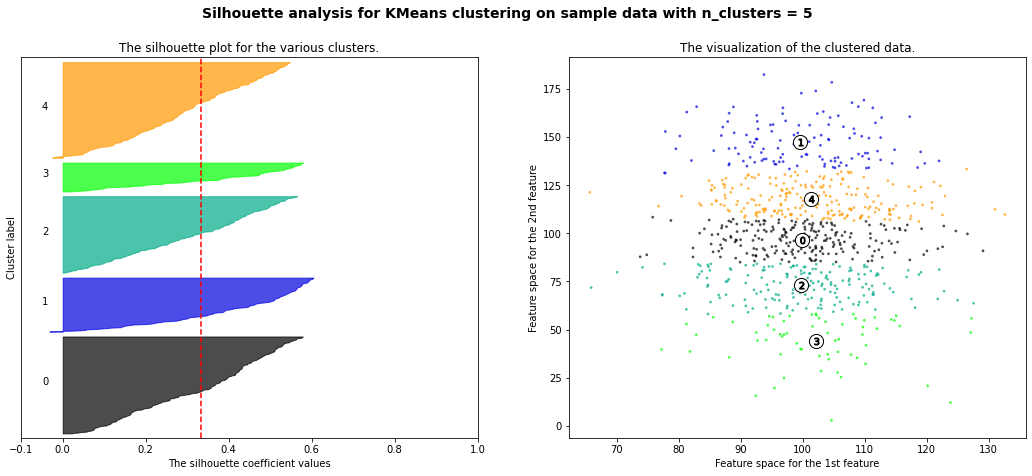

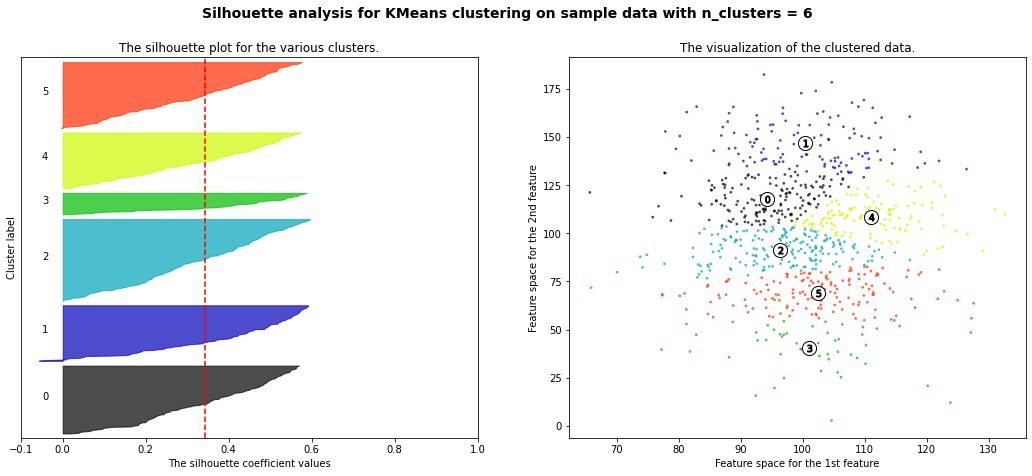

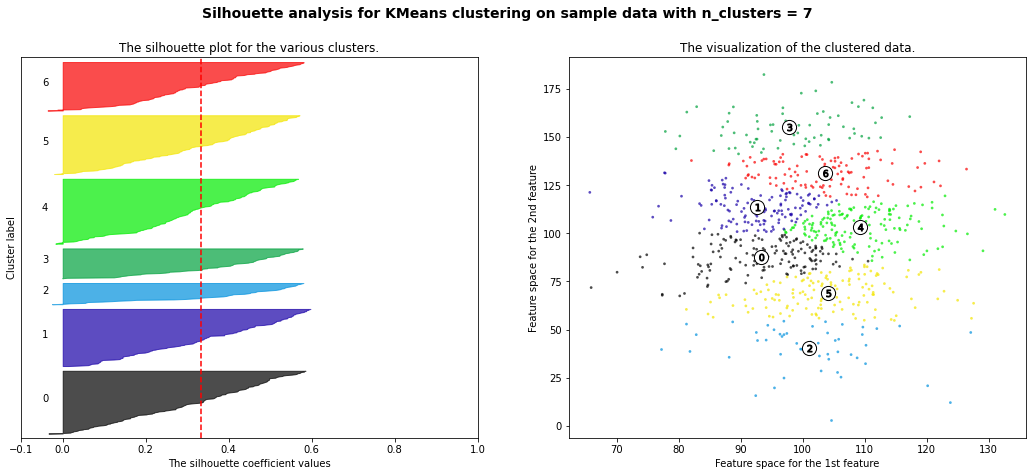

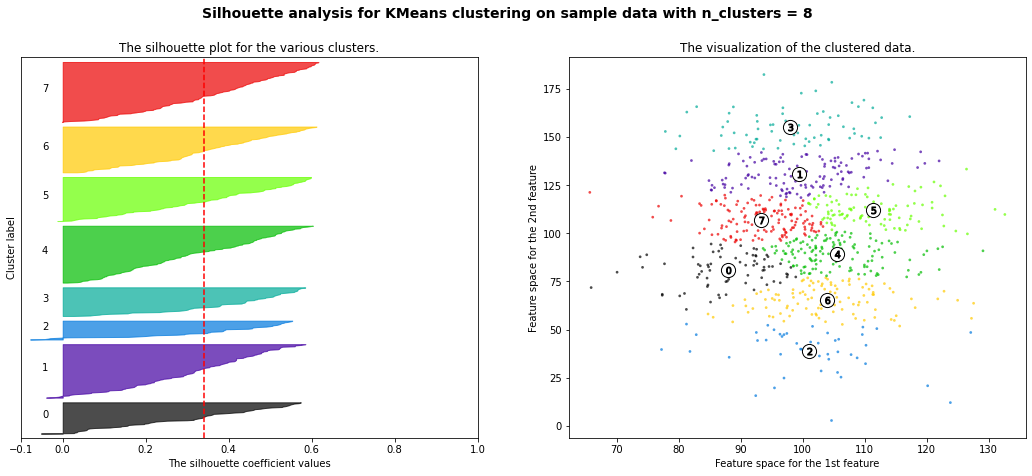

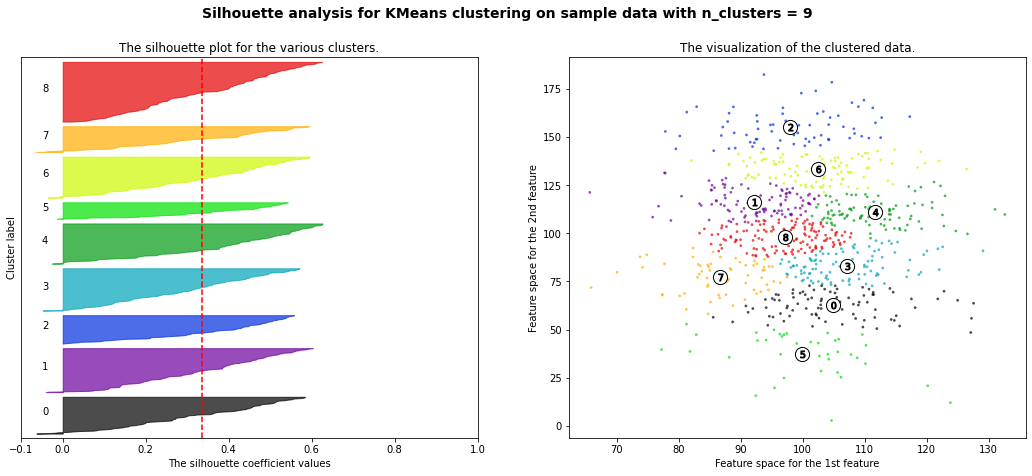

In [ ]:
import sys
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

s=[]
for i in range (0,800):
  s.append(i)

n= len(s)
data = {'Subjective Score': np.random.normal(100, 10, n),
        'MCQ Score': np.random.normal(100, 30, n)    
       }
df = pd.DataFrame(data=data, index=s)
print(df)

df.plot(kind='scatter',x='Subjective Score',y='MCQ Score',color='blue')
plt.show()


kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print("Centroids for n_clusters=3:\n",centroids)

plt.scatter(df['Subjective Score'], df['MCQ Score'], c= kmeans.labels_.astype(float), s=50, alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()



def calculateEucleid(point,centroids):
  n=len(centroids)
  k=1
  c=0
  nearest_centroid=[]
  min_dist=sys.maxsize * 2 + 1

  for centroid in centroids:
    dist=math.sqrt((point[0]-centroid[0])**2+(point[1]-centroid[1])**2)
    c+=1
    if dist< min_dist:
       min_dist=dist
       nearest_centroid=centroid
       k=c

  print("Minimum distance of point from nearest centroid=",min_dist)
  print("NEAREST CENTROID",nearest_centroid)


point_to_be_predicted=[65.75,77]
wcss = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    cluster_labels = kmeans.fit_predict(df)
    centroids = kmeans.cluster_centers_
    print("Centroids for n_clusters=",i,":\n",centroids)
    calculateEucleid(point_to_be_predicted,centroids)
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", i,
          "The average silhouette_score is :", silhouette_avg,"\n")
    kmeans.fit(df)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(10,5))
sns.lineplot(range(2, 10), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


range_n_clusters = [2, 3, 4, 5, 6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df['Subjective Score'], df['MCQ Score'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()